In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import geopy
import statsmodels.api as sm
import folium
from folium.plugins import MarkerCluster

# the below extension properly formats a cell after it is run
%load_ext nb_black 

# Set the maximum number of rows to 200
pd.set_option("display.max_rows", 200)
import pandas as pd

# Set the maximum number of columns to 200
pd.set_option('display.max_columns', 200)



<IPython.core.display.Javascript object>

In [2]:
housing_no_na = pd.read_csv("data/housing_no_na.csv")

<IPython.core.display.Javascript object>

In [6]:
housing_no_na.columns.sort_values()

Index(['1stFlrSF', '2ndFlrSF', '3SsnPorch', 'Alley', 'BedroomAbvGr',
       'BldgType', 'BsmtCond', 'BsmtExposure', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtFinType1', 'BsmtFinType2', 'BsmtFullBath', 'BsmtHalfBath',
       'BsmtQual', 'BsmtUnfSF', 'CentralAir', 'Condition1', 'Condition2',
       'Electrical', 'EnclosedPorch', 'ExterCond', 'ExterQual', 'Exterior1st',
       'Exterior2nd', 'Fence', 'FireplaceQu', 'Fireplaces', 'Foundation',
       'FullBath', 'Functional', 'GarageArea', 'GarageCars', 'GarageCond',
       'GarageFinish', 'GarageQual', 'GarageType', 'GarageYrBlt', 'GrLivArea',
       'HalfBath', 'Heating', 'HeatingQC', 'HouseStyle', 'KitchenAbvGr',
       'KitchenQual', 'LandContour', 'LandSlope', 'LotArea', 'LotConfig',
       'LotFrontage', 'LotShape', 'LowQualFinSF', 'MSSubClass', 'MSZoning',
       'MasVnrArea', 'MasVnrType', 'MiscFeature', 'MiscVal', 'MoSold',
       'Neighborhood', 'OpenPorchSF', 'OverallCond', 'OverallQual', 'PID',
       'PavedDrive', 'PoolArea', 'P

<IPython.core.display.Javascript object>

In [3]:
# checking for highly inbalanced distributions
for col in housing_no_na.columns:
    value_counts = housing_no_na[col].value_counts(normalize=True)
    highest_freq = value_counts.max()
    if highest_freq > 0.95:
        print(f"Column {col} has highest frequency of {highest_freq:.2%}")

Column Street has highest frequency of 99.61%
Column Utilities has highest frequency of 99.92%
Column LandSlope has highest frequency of 95.27%
Column Condition2 has highest frequency of 99.03%
Column RoofMatl has highest frequency of 98.60%
Column Heating has highest frequency of 98.45%
Column LowQualFinSF has highest frequency of 98.72%
Column KitchenAbvGr has highest frequency of 95.85%
Column 3SsnPorch has highest frequency of 98.84%
Column PoolArea has highest frequency of 99.65%
Column PoolQC has highest frequency of 99.65%
Column MiscFeature has highest frequency of 96.24%
Column MiscVal has highest frequency of 96.32%


<IPython.core.display.Javascript object>

In [4]:
# checking for correlation among the variables with highly inbalanced distributions
high_freq_cols = [
    "Street",
    "Utilities",
    "LandSlope",
    "Condition2",
    "RoofMatl",
    "Heating",
    "LowQualFinSF",
    "KitchenAbvGr",
    "3SsnPorch",
    "PoolArea",
    "PoolQC",
    "MiscFeature",
    "MiscVal",
]

# create a subset of the housing_no_na dataframe with only the selected columns
subset = housing_no_na[high_freq_cols]

# create a correlation matrix
corr_matrix = subset.corr()

# display the correlation matrix
print(corr_matrix)

              LowQualFinSF  KitchenAbvGr  3SsnPorch  PoolArea   MiscVal
LowQualFinSF      1.000000     -0.014375  -0.002534 -0.005239 -0.005184
KitchenAbvGr     -0.014375      1.000000  -0.019766 -0.010906  0.040088
3SsnPorch        -0.002534     -0.019766   1.000000 -0.005441  0.001152
PoolArea         -0.005239     -0.010906  -0.005441  1.000000  0.021245
MiscVal          -0.005184      0.040088   0.001152  0.021245  1.000000


<IPython.core.display.Javascript object>

In [12]:
housing_no_na[
    [
        "Street",
        "Utilities",
        "LandSlope",
        "Condition2",
        "RoofMatl",
        "Heating",
        "LowQualFinSF",
        "KitchenAbvGr",
        "3SsnPorch",
        "PoolArea",
        "PoolQC",
        "MiscFeature",
        "MiscVal",
    ]
].dtypes

Street          object
Utilities       object
LandSlope       object
Condition2      object
RoofMatl        object
Heating         object
LowQualFinSF     int64
KitchenAbvGr     int64
3SsnPorch        int64
PoolArea         int64
PoolQC          object
MiscFeature     object
MiscVal          int64
dtype: object

<IPython.core.display.Javascript object>

In [13]:
# define the independent and dependent variables
X = housing_no_na[
    [
        "Street",
        "Utilities",
        "LandSlope",
        "Condition2",
        "RoofMatl",
        "Heating",
        "LowQualFinSF",
        "KitchenAbvGr",
        "3SsnPorch",
        "PoolArea",
        "PoolQC",
        "MiscFeature",
        "MiscVal",
    ]
]
y = housing_no_na["SalePrice"]

# create dummy variables for categorical columns
X = pd.get_dummies(X)

# add a constant to the independent variables
X = sm.add_constant(X)

# fit the multiple linear regression model
model = sm.OLS(y, X).fit()

# print the summary of the model
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.089
Model:                            OLS   Adj. R-squared:                  0.076
Method:                 Least Squares   F-statistic:                     7.098
Date:                Wed, 22 Feb 2023   Prob (F-statistic):           3.92e-32
Time:                        11:08:39   Log-Likelihood:                -32502.
No. Observations:                2580   AIC:                         6.508e+04
Df Residuals:                    2544   BIC:                         6.529e+04
Df Model:                          35                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              8.521e+04   4.18e+0

<IPython.core.display.Javascript object>

In [19]:
# It appears that only a few of the features have a statistically significant relationship with the SalePrice. 
# These features have a p-value less than 0.05 and indicate that there is a high likelihood that 
# the coefficient is not equal to zero. These features are: Street, Utilities, LandSlope, Condition2,
# RoofMatl, Heating, PoolQC, and KitchenAbvGr. 

# I am going to drop the columns with no relationship with the sale price and highly imbalanced distributions. 

columns_to_drop = ["3SsnPorch", "PoolArea", "MiscFeature", "LowQualFinSF"]
housing_cleaned = housing_no_na.drop(columns_to_drop, axis=1)

# since i removed the misc house features Im also going to remove the value of these items
housing_cleaned['SalePrice'] = housing_cleaned['SalePrice'] - housing_cleaned['MiscVal']

# and will now remove the MiscVal column
housing_cleaned.drop('MiscVal', axis=1, inplace=True)



 


<IPython.core.display.Javascript object>

In [28]:
# Some key takeaways from running the below:
# SalePrice has a mean value of approximately 178,011 and a standard deviation of approximately 75,042.
# The YearBuilt column has a minimum value of 1872 and a maximum value of 2010, indicating that the
#     houses in the dataset were built over a wide range of years.
# The GrLivArea column has a mean value of approximately 1,486 square feet and a standard deviation
#     of approximately 489 square feet, indicating that there is a wide range in the sizes of the living
#     areas in the houses in the dataset.
# The OverallQual column has a mean value of approximately 6, indicating that most of the houses in the 
#     dataset are rated as having an above average overall quality.
# The GarageCars column has a mean value of approximately 1.75, indicating that most of the houses in 
#     the dataset have a 1-2 car garage.
# The TotRmsAbvGrd column has a mean value of approximately 6, indicating that most of the houses in 
#     the dataset have between 5-7 rooms above ground.
# The Fireplaces column has a mean value of approximately 0.6, indicating that most of the houses in 
#     the dataset have at least one fireplace.
    
housing_cleaned.describe()

PID    GrLivArea      SalePrice   MSSubClass  LotFrontage  \
count  2.580000e+03  2580.000000    2580.000000  2580.000000  2580.000000   
mean   7.148300e+08  1486.039922  178010.891860    57.691860    56.067829   
std    1.886626e+08   488.650181   75042.160446    42.802105    33.745030   
min    5.263011e+08   334.000000   12789.000000    20.000000    -1.000000   
25%    5.313630e+08  1112.000000  129900.000000    20.000000    40.000000   
50%    5.354546e+08  1436.000000  159500.000000    50.000000    61.000000   
75%    9.071811e+08  1733.000000  209625.000000    70.000000    78.000000   
max    1.007100e+09  4676.000000  755000.000000   190.000000   313.000000   

             LotArea  OverallQual  OverallCond    YearBuilt  YearRemodAdd  \
count    2580.000000  2580.000000  2580.000000  2580.000000   2580.000000   
mean    10120.153488     6.046124     5.618605  1970.313953   1983.751938   
std      8126.937892     1.367590     1.122008    29.719705     20.490242   
min      1300.000000     1.000000     1.000000  1872.000000   1950.000000   
25%      7406.750000     5.000000     5.000000  1953.000000   1965.000000   
50%      9391.000000     6.000000     5.000000  1972.000000   1992.000000   
75%     11494.000000     7.000000     6.000000  1999.000000   2003.000000   
max    215245.000000    10.000000     9.000000  2010.000000   2010.000000   

        MasVnrArea   BsmtFinSF1   BsmtFinSF2    BsmtUnfSF  TotalBsmtSF  \
count  2580.000000  2580.000000  2580.000000  2580.000000  2580.000000   
mean     98.769380   444.174031    53.218217   538.892636  1036.284884   
std     175.546045   429.340844   174.393251   425.249665   418.971677   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.000000     0.000000     0.000000   214.750000   791.750000   
50%       0.000000   384.000000     0.000000   448.000000   979.000000   
75%     157.000000   732.000000     0.000000   784.000000  1266.250000   
max    1600.000000  2288.000000  1526.000000  2336.000000  3206.000000   

          1stFlrSF     2ndFlrSF  BsmtFullBath  BsmtHalfBath     FullBath  \
count  2580.000000  2580.000000   2580.000000   2580.000000  2580.000000   
mean   1144.975194   336.820155      0.434884      0.062016     1.550775   
std     375.958955   424.072452      0.518768      0.244424     0.545825   
min     334.000000     0.000000      0.000000      0.000000     0.000000   
25%     871.750000     0.000000      0.000000      0.000000     1.000000   
50%    1071.000000     0.000000      0.000000      0.000000     2.000000   
75%    1364.000000   703.000000      1.000000      0.000000     2.000000   
max    3820.000000  1872.000000      3.000000      2.000000     4.000000   

          HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd   Fireplaces  \
count  2580.000000   2580.000000    2580.00000   2580.000000  2580.000000   
mean      0.378295      2.850388       1.04031      6.387209     0.604264   
std       0.499237      0.822863       0.20255      1.535186     0.648604   
min       0.000000      0.000000       0.00000      2.000000     0.000000   
25%       0.000000      2.000000       1.00000      5.000000     0.000000   
50%       0.000000      3.000000       1.00000      6.000000     1.000000   
75%       1.000000      3.000000       1.00000      7.000000     1.000000   
max       2.000000      6.000000       3.00000     13.000000     4.000000   

       GarageYrBlt   GarageCars   GarageArea   WoodDeckSF  OpenPorchSF  \
count  2580.000000  2580.000000  2580.000000  2580.000000  2580.000000   
mean   1878.082946     1.746899   466.661628    95.919767    46.085271   
std     431.844143     0.739335   207.640127   129.052016    66.060664   
min      -1.000000     0.000000     0.000000     0.000000     0.000000   
25%    1957.000000     1.000000   318.000000     0.000000     0.000000   
50%    1977.000000     2.000000   474.000000     0.000000    25.500000   
75%    1999.000000     2.000000   576.000000   168.000000    68.

<IPython.core.display.Javascript object>

In [29]:
housing_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2580 entries, 0 to 2579
Data columns (total 76 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   PID            2580 non-null   int64  
 1   GrLivArea      2580 non-null   int64  
 2   SalePrice      2580 non-null   int64  
 3   MSSubClass     2580 non-null   int64  
 4   MSZoning       2580 non-null   object 
 5   LotFrontage    2580 non-null   float64
 6   LotArea        2580 non-null   int64  
 7   Street         2580 non-null   object 
 8   Alley          2580 non-null   object 
 9   LotShape       2580 non-null   object 
 10  LandContour    2580 non-null   object 
 11  Utilities      2580 non-null   object 
 12  LotConfig      2580 non-null   object 
 13  LandSlope      2580 non-null   object 
 14  Neighborhood   2580 non-null   object 
 15  Condition1     2580 non-null   object 
 16  Condition2     2580 non-null   object 
 17  BldgType       2580 non-null   object 
 18  HouseSty

<IPython.core.display.Javascript object>

In [45]:
# looks like the recession had little effect on the housing market in Ames
for i in range(1, 4):
    col_name = f"BedroomAbvGr_{i}"
    filtered_data = housing_cleaned.loc[
        housing_cleaned["BedroomAbvGr"] == i, ["SalePrice", "YrSold"]
    ]
    if not filtered_data.empty:
        avg_price = filtered_data.groupby("YrSold").mean()
        print(f"Average price for {i} bedroom(s) in each year:\n{avg_price}\n")

Average price for 1 bedroom(s) in each year:
            SalePrice
YrSold               
2006    154153.210526
2007    194558.545455
2008    183832.608696
2009    145451.136364
2010    210285.538462

Average price for 2 bedroom(s) in each year:
            SalePrice
YrSold               
2006    161466.760563
2007    163147.089041
2008    159606.792857
2009    161309.225166
2010    149791.961039

Average price for 3 bedroom(s) in each year:
            SalePrice
YrSold               
2006    172470.102273
2007    173514.189911
2008    176426.335593
2009    187344.123529
2010    172955.109827



<IPython.core.display.Javascript object>

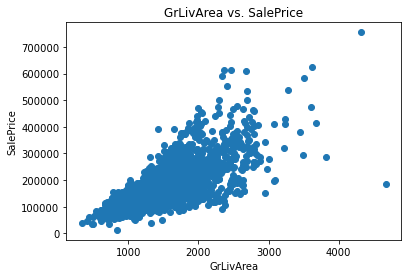

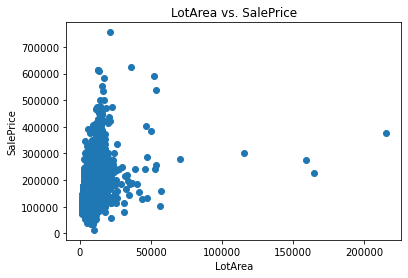

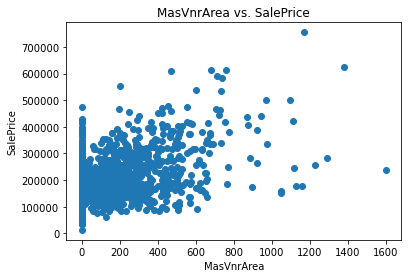

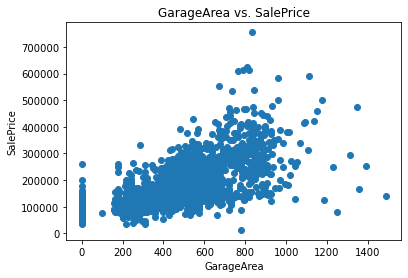

<IPython.core.display.Javascript object>

In [30]:
# taking a look at how the Area features relate to SalePrice

for column in housing_cleaned.columns:
    if "Area" in column:
        plt.scatter(housing_cleaned[column], housing_cleaned["SalePrice"])
        plt.title(f"{column} vs. SalePrice")
        plt.xlabel(column)
        plt.ylabel("SalePrice")
        plt.show()


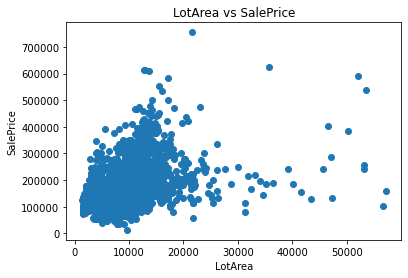

<IPython.core.display.Javascript object>

In [32]:
# after removing outliers it seems that lot area has less of an effect than expected

# Filter the DataFrame to remove the outliers
df_filtered = housing_cleaned[housing_cleaned['LotArea'] <= 60000]

# Plot the scatterplot of LotArea vs SalePrice
plt.scatter(df_filtered['LotArea'], df_filtered['SalePrice'])
plt.title('LotArea vs SalePrice')
plt.xlabel('LotArea')
plt.ylabel('SalePrice')
plt.show()


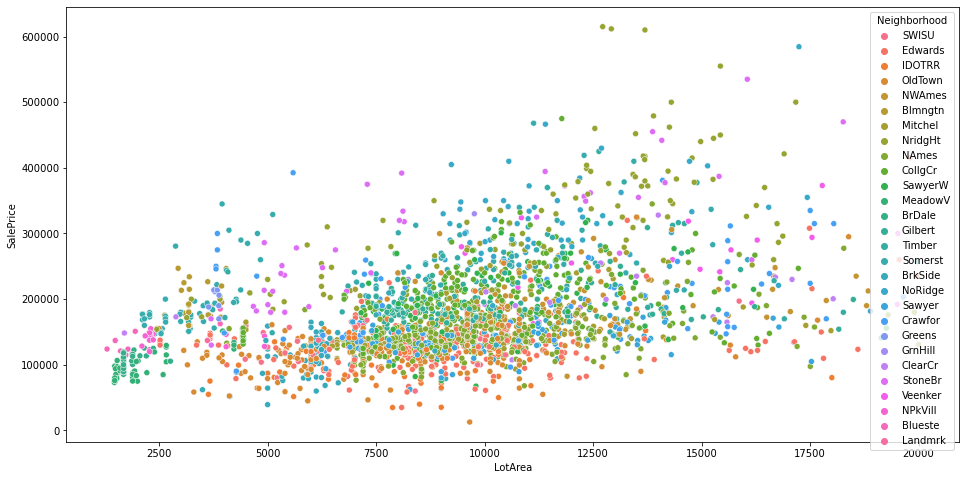

<IPython.core.display.Javascript object>

In [36]:
# when factoring in the neighborhood it looks like there is more of a relationship with lot area and sale price

# Filter out outliers with LotArea above 20000 to zoom in on the gaph
filtered = housing_cleaned[housing_cleaned['LotArea'] <= 20000]

# Create a scatterplot of LotArea vs SalePrice, colored by Neighborhood
plt.figure(figsize=(16, 8))
sns.scatterplot(data=filtered, x='LotArea', y='SalePrice', hue='Neighborhood')
plt.show()


In [44]:
# Taking a closer look at the neighborhoods
neighborhood_stats = housing_cleaned.groupby('Neighborhood')['SalePrice'].agg(['count', 'max', 'min', 'mean']).round(0)

print('\nStats for each neighborhood:')
print(neighborhood_stats.sort_values(by='mean', ascending=False))



Stats for each neighborhood:
              count     max     min      mean
Neighborhood                                 
NoRidge          67  755000  190000  326114.0
NridgHt         121  615000  154000  313662.0
StoneBr          43  591587  130000  305308.0
GrnHill           2  330000  230000  280000.0
Veenker          23  385000  150000  251263.0
Timber           54  425000  150000  242850.0
Somerst         143  468000  139000  228762.0
ClearCr          40  328000  107500  213958.0
Crawfor          93  392500   90350  201942.0
CollgCr         236  475000  110000  198104.0
Blmngtn          23  246990  159895  196237.0
Greens            8  214000  155000  193531.0
NWAmes          123  306000   82500  190330.0
Gilbert         143  377500  114250  189402.0
SawyerW         113  320000   67500  188075.0
Mitchel         104  300000   81500  162602.0
NAmes           410  345000   68000  144960.0
Blueste          10  200000  115000  143590.0
NPkVill          22  155000  120000  140743.0
Sawy

<IPython.core.display.Javascript object>

In [82]:
locations = pd.read_csv("data/locations.csv", index_col=0)
locations

PID  SalePrice Neighborhood                       Prop_Addr  \
0     909176150     126000        SWISU      436 HAYWARD AVE, AMES, USA   
1     905476230     139500      Edwards         3416 WEST ST, AMES, USA   
2     905476230     139500      Edwards         3416 WEST ST, AMES, USA   
3     911128020     124900       IDOTRR         320 S 2ND ST, AMES, USA   
4     535377150     114000      OldTown     1524 DOUGLAS AVE, AMES, USA   
...         ...        ...          ...                             ...   
2599  903205040     121000      BrkSide   1021 RIDGEWOOD AVE, AMES, USA   
2600  905402060     139600      Edwards        3619 MARY CIR, AMES, USA   
2601  909275030     145000      Crawfor  2140 SUNSET DR 2142, AMES, USA   
2602  907192040     217500      CollgCr    5319 CLEMENS BLVD, AMES, USA   
2603  906223180     215000      SawyerW      1025 VERMONT CT, AMES, USA   

       latitude  longitude  
0     42.018564 -93.651619  
1     42.024855 -93.663671  
2     42.024855 -93.663671  
3     42.021548 -93.614068  
4     42.037391 -93.612207  
...         ...        ...  
2599  42.032102 -93.626373  
2600  42.027669 -93.666138  
2601  42.020129 -93.643832  
2602  42.016802 -93.689748  
2603  42.030997 -93.682220  

[2604 rows x 6 columns]

<IPython.core.display.Javascript object>

In [75]:
# Taking a closer look at the neighborhoods
neighborhood_lot = housing_cleaned.groupby('Neighborhood')['LotArea'].agg(['count', 'max', 'min', 'mean']).round(0)

print('\nStats for each neighborhood:')
print(neighborhood_lot.sort_values(by='mean', ascending=False))



Stats for each neighborhood:
              count     max   min     mean
Neighborhood                              
ClearCr          40  159000  1700  26094.0
Timber           54  215245  4054  19683.0
Veenker          23   50271  9466  15738.0
NoRidge          67   46589  9044  12971.0
Mitchel         104   43500  4500  11985.0
Crawfor          93   26073  3811  11740.0
NWAmes          123   20781  8000  11730.0
Gilbert         143   47280  7250  11288.0
NridgHt         121   20431  2268  11004.0
StoneBr          43   53504  3696  10843.0
SawyerW         113   26400  7018  10367.0
Sawyer          139   25339  4280  10289.0
Edwards         165   47007  2522  10079.0
CollgCr         236   21533  4426  10017.0
NAmes           410   31770  4058   9937.0
GrnHill           2    9763  8239   9001.0
IDOTRR           76   56600  3636   8790.0
OldTown         213   33120  2500   8366.0
SWISU            42   15863  4484   7598.0
Somerst         143   20896  2117   7323.0
BrkSide         103   21

<IPython.core.display.Javascript object>

In [81]:
# Group the data by neighborhood
grouped = housing_cleaned.groupby('Neighborhood')

# Iterate over each group
for name, group in grouped:
    # Exclude features that have "area" in the feature name and SalePrice or PID
    features = [col for col in group.columns if 'Area' not in col and 'SF' not in col and col != 'SalePrice' and col != 'PID']

#     features = [col for col in group.columns if 'Area' not in col and col != 'SalePrice' and col != 'PID']
    # Calculate the correlation coefficients between sale price and each feature
    correlations = group[features].corrwith(group['SalePrice'])
    # Get the absolute values of the correlation coefficients and sort in descending order
    correlations = correlations.abs().sort_values(ascending=False)
    # Print the name of the most important feature for predicting sale price in this neighborhood
    print(f'Most important feature for {name}: {correlations.index[0]}')


Most important feature for Blmngtn: BsmtFullBath
Most important feature for Blueste: LotFrontage
Most important feature for BrDale: TotRmsAbvGrd
Most important feature for BrkSide: OverallQual
Most important feature for ClearCr: OverallQual
Most important feature for CollgCr: OverallQual
Most important feature for Crawfor: OverallQual
Most important feature for Edwards: Fireplaces
Most important feature for Gilbert: GarageCars
Most important feature for Greens: TotRmsAbvGrd
Most important feature for GrnHill: YearBuilt
Most important feature for IDOTRR: OverallQual
Most important feature for Landmrk: MSSubClass
Most important feature for MeadowV: OverallQual
Most important feature for Mitchel: OverallQual
Most important feature for NAmes: OverallQual
Most important feature for NPkVill: MSSubClass
Most important feature for NWAmes: TotRmsAbvGrd
Most important feature for NoRidge: FullBath
Most important feature for NridgHt: OverallQual
Most important feature for OldTown: OverallQual
Mos

/Users/jasonphillip/opt/anaconda3/lib/python3.9/site-packages/numpy/lib/function_base.py:2683: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/Users/jasonphillip/opt/anaconda3/lib/python3.9/site-packages/numpy/lib/function_base.py:2542: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


<IPython.core.display.Javascript object>

In [101]:
import folium
import branca
from folium.plugins import MarkerCluster


# Calculate six equally spaced intervals for sale prices
sale_price_min = locations['SalePrice'].min()
sale_price_max = locations['SalePrice'].max()
interval = (sale_price_max - sale_price_min) / 10
levels = [sale_price_min + interval * i for i in range(10)]
colors = branca.colormap.LinearColormap(['red', 'orange', 'yellow', 'green', 'blue', 'indigo', 'violet', 'pink', 'brown', 'gray'],
                                        vmin=sale_price_min, vmax=sale_price_max)


# create map centered on Ames, Iowa
m = folium.Map(location=[42.0308, -93.6319], zoom_start=12)

# create a feature group for the locations
fg = folium.FeatureGroup(name='Locations')

# loop through the locations dataframe and add a circle marker for each location
for i, row in locations.dropna().iterrows():
    lat, lon = row['latitude'], row['longitude']
    sale_price = row['SalePrice']
    for j in range(len(levels) - 1):
        if levels[j] <= sale_price < levels[j + 1]:
            color = colors(sale_price)
            break
    folium.CircleMarker(
        location=[lat, lon],
        radius=5,
        color=color,
        fill_color=color,
        fill_opacity=0.7,
        popup=f'Sale Price: ${sale_price}',
    ).add_to(fg)

# add the feature group to the map
fg.add_to(m)

# add a layer control to the map
folium.LayerControl().add_to(m)

# # create the legend
legend = colors.caption = 'Sale Price'
for i in range(len(levels) - 1):
    legend += f'<br>{levels[i]:.2f} - {levels[i+1]:.2f}: <span style="color:{colors(levels[i])}">●</span>'
    
# # add the legend to the map
m.get_root().html.add_child(folium.Element(legend))


# display the map
m


<IPython.core.display.Javascript object>